# EDA(Exploratory Data Analysis) &
# Pre-processing(cleaning)

In [1]:
##ISSUES

#1] missing value
#2] skewness
#3] outlier
#4] categorical data
#5]scale


##a]  missing values
#builder /location/ area/no. of rooms 
 #builder /location is categorical so if they are empty then go with the mode / on the basis of other feature / or can give some other name on ur own
 #area is continuous / so in that case mean /average
#no. of rooms is discrete / so if its empty then go with the mode/ on the basis of other feature
#if builder coloum has 70 % null values the its better to drop the column / we can add ourb own values which is not recommended ......


##b] outliers
#box plot where one is target and the other is any categorical data

##c] categorical data

##1]Location 
#thane , vashi, borivali,thane,vashi
#so label encoding says that label thane as 1, borivali-2, vashi-3  so location would be 1,3,2,1,3
 
##2]one - hot encoding

#Gender    Male        Female      Transgender
#M	         1	         0          0
#M	         1	         0          0
#F	         0	         1          0
#M	         1	         0          0
#F	         0           0          0
#T           0           0          1



##d] Skewness
#skewness can reduced only on continuous data by square root and log
# skewness should only be performed on the columns which have bad correlation  between continuous data and target means the graph is fully scattered e.g of garden area vs price
# skewness should not  be performed on the columns which have good correlation  between continuous data and target means the graph is scattered in one line e.g of  area vs price

##e] Scale
# X1   X2	ans
#100	1	0
#200	2	0.5
#300	3	1

#1) min-max scaler

#Xnew = Xold -  min/(max-min)
#xold is given values of x.. min value will be 0 and  max value will be 1 and rest values will be between 0 to 1


#2) Std scalar(Standardization)
# z score= (x - mean)   / std. deviation
# ans would be mean will be 0 , greater than mean will be +ve, lower than mean will be -ve

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')## to skip warnings in red color

# Missing Values

# all changes are temporary

In [3]:
## to create null values
np.nan

nan

In [4]:
name = ["john","jack","jill","kenny","kevin"]
math = [89,78,67,np.nan,85]
science = [78,75,np.nan,np.nan,76]

In [5]:
dic = {"name":name,"math":math,"science":science}

In [6]:
df = pd.DataFrame(dic)

In [7]:
df

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
2,jill,67.0,NaN
3,kenny,NaN,NaN
4,kevin,85.0,76.0


In [8]:
df.isnull() ## where there is null true is written

,name,math,science
0,False,False,False
1,False,False,False
2,False,False,True
3,False,True,True
4,False,False,False


In [9]:
df.isnull().sum() ## in how many columns how many null values are presented

name       0
math       1
science    2
dtype: int64

In [10]:
df.dropna

<bound method DataFrame.dropna of     name  math  science
0   john  89.0     78.0
1   jack  78.0     75.0
2   jill  67.0      NaN
3  kenny   NaN      NaN
4  kevin  85.0     76.0>

In [11]:
df.dropna(axis=1)## to drop the columns where there is null value

,name
0,john
1,jack
2,jill
3,kenny
4,kevin


In [12]:
df.drop(0)## to drop particular row-0 

,name,math,science
1,jack,78.0,75.0
2,jill,67.0,NaN
3,kenny,NaN,NaN
4,kevin,85.0,76.0


In [13]:
df.drop([0,1,2])# to drop multiple rows

,name,math,science
3,kenny,NaN,NaN
4,kevin,85.0,76.0


In [14]:
df.drop("name",axis=1)## to drop using column name

,math,science
0,89.0,78.0
1,78.0,75.0
2,67.0,NaN
3,NaN,NaN
4,85.0,76.0


In [15]:
df.drop("math",axis=1)

,name,science
0,john,78.0
1,jack,75.0
2,jill,NaN
3,kenny,NaN
4,kevin,76.0


In [16]:
df.drop(["name","math"],axis=1)

,science
0,78.0
1,75.0
2,NaN
3,NaN
4,76.0


In [17]:
df.fillna(0)## to fill the null values

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
2,jill,67.0,0.0
3,kenny,0.0,0.0
4,kevin,85.0,76.0


In [18]:
df.fillna(method="ffill")## the value above the null value will be filled in the place of null values is forward fill(not recommeneded)

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
2,jill,67.0,75.0
3,kenny,67.0,75.0
4,kevin,85.0,76.0


In [19]:
df.fillna(method="bfill")## the value below the null value will be filled in the place of null values is backward fill(not recommeneded) 

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
2,jill,67.0,76.0
3,kenny,85.0,76.0
4,kevin,85.0,76.0


In [20]:
x = df["math"].mean()

In [21]:
df["math"].fillna(x, inplace=True)## to fill the mean value of math in math null values if inplace =True is written then the changes will be permanent

In [22]:
y = df["science"].mean()

In [23]:
y

76.33333333333333

In [24]:
# IN ONE STEP 
df["science"].fillna(df["science"].mean(),inplace=True)

In [25]:
df = pd.read_csv("cars.csv")

In [50]:
df

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114.0,23,28,16845
201,-1,95.0,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160.0,19,25,19045
202,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134.0,18,23,21485
203,-1,95.0,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106.0,26,27,22470


In [30]:
df.isnull().sum() ## where there is null true is written means only NaN values can be predicted nothing else with is null()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [35]:
df.info() # normalized losses & horse power are int type columns but it is shown as object means there is something different character like ?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
width                205 non-null float64
height               205 non-null float64
engine-type          205 non-null object
engine-size          205 non-null int64
horsepower           205 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                205 non-null int64
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [36]:
df["normalized-losses"].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [34]:
df["horsepower"].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [46]:
##we can not use fillna() directlly because it is used to fill NAN values not other character values and we use float or int  because otherwise data is in string format and arithmetic mean( can not be taken of strings) 
df["normalized-losses"].replace("?",np.nan,inplace=True)
df["normalized-losses"] = df["normalized-losses"].astype(float)

In [47]:
df["normalized-losses"].fillna(df["normalized-losses"].mean(),inplace=True)

In [48]:
df["horsepower"].replace("?",np.nan,inplace=True)
df["horsepower"] = df["horsepower"].astype(float)

In [49]:
df["horsepower"].fillna(df["horsepower"].mean(),inplace=True)

# HOW TO REMOVE THE OUTLIERS FROM UR DATA

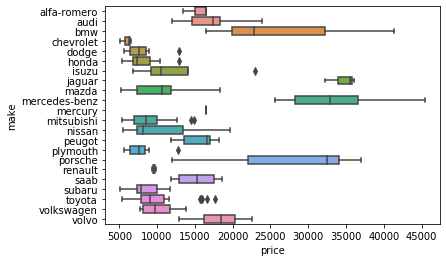

In [54]:
sns.boxplot(data=df,x="price",y="make")
plt.show()

In [55]:
## condition filtering
df[(df["make"] == "isuzu") & (df["price"] > 22000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
45,0,122.0,isuzu,gas,sedan,fwd,front,63.6,52.0,ohc,90,70.0,38,43,23000


In [58]:
## to drop a row
df.drop(45,inplace=True)

In [59]:
df[(df["make"] == "plymouth") & (df["price"] > 12000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
124,3,122.0,plymouth,gas,hatchback,rwd,front,66.3,50.2,ohc,156,145.0,19,24,12764


In [60]:
## 124 index should be dropped becoz it is an outlier
df.drop(124,inplace=True)

In [61]:
df[(df["make"] == "toyota") & (df["price"] > 15000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
172,2,134.0,toyota,gas,convertible,rwd,front,65.6,53.0,ohc,146,116.0,24,30,17669
178,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,20,24,16558
179,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,19,24,15998
180,-1,90.0,toyota,gas,sedan,rwd,front,66.5,54.1,dohc,171,156.0,20,24,15690
181,-1,122.0,toyota,gas,wagon,rwd,front,66.5,54.1,dohc,161,156.0,19,24,15750


In [62]:
## to remove multiple outliers
df.drop([172,178,179,180,181],inplace=True)

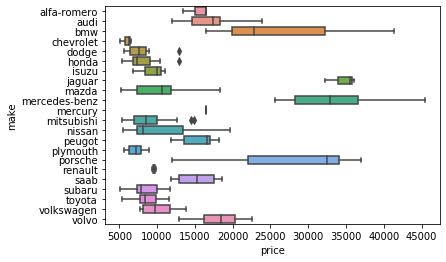

In [63]:
sns.boxplot(data=df,x="price",y="make")
plt.show()

# Handling Categorical data

In [66]:
## to separate categorical and numerical data after missing values and outliers then go for separation
df_num = df.select_dtypes(["float64","int64"]) ## they both are for numerical data
df_cat = df.select_dtypes(object) ## it is for categorical data

In [67]:
df_num.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,2,164.0,66.4,54.3,136,115.0,18,22,17450


In [68]:
df_cat.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,convertible,rwd,front,dohc
1,alfa-romero,gas,convertible,rwd,front,dohc
2,alfa-romero,gas,hatchback,rwd,front,ohcv
3,audi,gas,sedan,fwd,front,ohc
4,audi,gas,sedan,4wd,front,ohc


In [71]:
## to convert into text data into numbers but one hot encoding is not used for conversion because no. of columns will incresed a/c to number of type
## one hot encoding is done on pandas library
pd.get_dummies(df_cat["fuel-type"])

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


In [72]:
fuel_data = pd.get_dummies(df_cat["fuel-type"])

In [74]:
## pd.concat([df_cat,fuel_data],axis=1)
## for concating the dummies into df_cat temporarilly

In [78]:
## for label encoding we need to import this first
from sklearn.preprocessing import LabelEncoder

In [79]:
le = LabelEncoder()

In [80]:
le.fit_transform(df_cat["body-style"])

array([0, 0, 2, 3, 3, 3, 3, 4, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2,
       2, 2, 2, 3, 3, 3, 4, 2, 2, 2, 2, 2, 2, 3, 4, 2, 2, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 3, 3,
       3, 4, 1, 3, 3, 0, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 3, 2, 3, 4, 1, 2, 3, 3, 4, 3, 2, 2, 2, 3, 3, 4, 4,
       3, 3, 4, 4, 3, 3, 3, 2, 2, 2, 3, 3, 4, 2, 1, 1, 0, 2, 4, 2, 2, 3,
       2, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 2, 2, 2, 4, 4, 4,
       3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 2, 1, 1, 2, 1, 2, 3, 3, 2, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 4, 3, 4, 3, 4, 3, 4, 3, 3, 3, 3, 3])

In [81]:
df_cat["body-style"].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [82]:
## LOOPING in label encoding
for col in df_cat:
    print(col)

make
fuel-type
body-style
drive-wheels
engine-location
engine-type


In [85]:
## no separately performing of label encoding for every column performing loop can do itfor col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])
